In [36]:
import pylab
import nest
noise = nest.Create('noise_generator')
nest.GetStatus(noise)

({u'dt': 1.0,
  u'element_type': <SLILiteral: stimulator>,
  u'frequency': 0.0,
  u'frozen': False,
  u'global_id': 56,
  u'local': True,
  u'local_id': 56,
  u'mean': 0.0,
  u'model': <SLILiteral: noise_generator>,
  u'node_uses_wfr': False,
  u'origin': 0.0,
  u'parent': 0,
  u'phase': 0.0,
  u'recordables': (<SLILiteral: I>,),
  u'start': 0.0,
  u'std': 0.0,
  u'std_mod': 0.0,
  u'stop': 1.7976931348623157e+308,
  u'supports_precise_spikes': False,
  u'thread': 0,
  u'thread_local_id': -1,
  u'vp': 0,
  u'y_0': 0.0,
  u'y_1': 0.0},)

In [57]:
def v_t(multimeter):
    dmm = nest.GetStatus(multimeter)[0]
    Vms = dmm["events"]["V_m"]
    ts = dmm["events"]["times"]
    return Vms,ts

In [65]:
def simulate(std=0.0,run_time=1000.0,Ie=375.0):
    import nest
    nest.ResetKernel()
    neuron = nest.Create("iaf_psc_alpha")
    nest.SetStatus(neuron, {"I_e": Ie})
    noise=nest.Create("noise_generator")
    nest.SetStatus(noise,{'mean': 0.0, 'std':std})
    multimeter = nest.Create("multimeter")
    nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
    spikedetector = nest.Create("spike_detector",params={"withgid": True, "withtime": True})
    nest.Connect(noise,neuron)
    nest.Connect(multimeter, neuron)
    nest.Connect(neuron, spikedetector)
    nest.Simulate(run_time)
    return multimeter , spikedetector

In [66]:
def create_spike_train(spikedetector):
    dSD = nest.GetStatus(spikedetector,keys="events")[0]
    evs = dSD["senders"]
    ts = dSD["times"]
    return ts

In [67]:
def fano_factor(time_seri):
    import numpy as np
    return np.var(time_seri)/np.mean(time_seri)

367
695
1200
1899
2697
3583
4533
5516
6432
7287


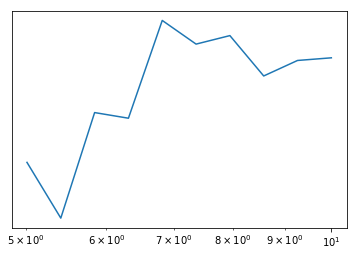

In [88]:
import numpy as np
import pylab as pl
std_array=np.logspace(0.7,1.0,10)
# std_array=[.1,.2]
ff_array=[]
for std in std_array:
    mlmt,spd=simulate(std,run_time=1000000.0,Ie=371.5)
    spike_train=create_spike_train(spd)
    print len(spike_train)
    ff=fano_factor(spike_train)
    ff_array.append(ff)
    
pylab.figure(1)
pl.loglog(std_array,ff_array)
# pl.vlines([5],0,1)
pl.show()
# pylab.figure(2)
# V,T=v_t(mlmt)
# pl.plot(T,V)
# pl.show()

In [41]:
import numpy as np

print std_array

[1.00000000e-04 1.77827941e-03 3.16227766e-02 5.62341325e-01
 1.00000000e+01]


In [20]:
import nest
nest.ResetKernel()
neuron = nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron, {"I_e": 375.0})
noise=nest.Create("noise_generator")
nest.SetStatus(noise,{'mean': 0.0, 'std':.0001})
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector",params={"withgid": True, "withtime": True})
nest.Connect(noise,neuron)
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)
nest.Simulate(1000.0)


number of spikes: 5


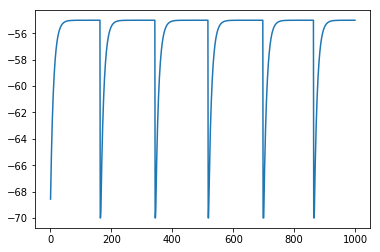

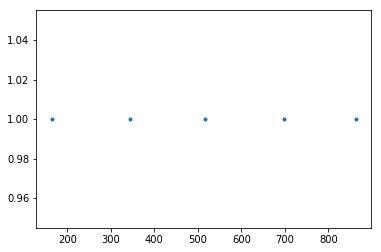

In [21]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

import pylab
pylab.figure(1)
pylab.plot(ts, Vms)
dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
print  "number of spikes:", len(ts)
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()


In [4]:
ts

array([ 59.3, 120.6, 181.9, 243.2, 304.5, 365.8, 427.1, 488.4, 549.7,
       611. , 672.3, 733.6, 794.9, 856.2, 917.5, 978.8])

In [5]:
import seaborn as sbn

/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


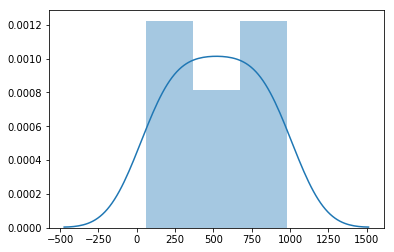

In [6]:
sbn.distplot(ts)